<a href="https://colab.research.google.com/github/RashmitaRaut/ARCoreApp/blob/main/Copy_of_Deep_Fake_P%E2%88%92S%E2%88%92240229%E2%88%92I%E2%88%92AIS%E2%88%920004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites
Let's make sure that we have access to GPU. We can use nvidia-smi command to do that. In case of any problems navigate to Edit -> Notebook settings -> Hardware accelerator, set it to GPU, and then click Save.

In [ ]:
# Run this to get GPU details
!nvidia-smi

Thu Feb 29 06:26:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Load the Dataset and Display Samples

In [ ]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id_1 = '1D10N7Zja4vi6WkdrNX-9syipoGJRJ-79'

download1 = drive.CreateFile({'id': file_id_1})

# Download the file to a local disc
download1.GetContentFile('archive.zip')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
import zipfile
import os

# Path to your zip file
zip_file_path = "/content/archive.zip"

# Directory to extract the contents to
extracted_dir_path = "/content/Dataset"

# Create a directory to extract the contents into
os.makedirs(extracted_dir_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

print("Extraction complete.")

Extraction complete.


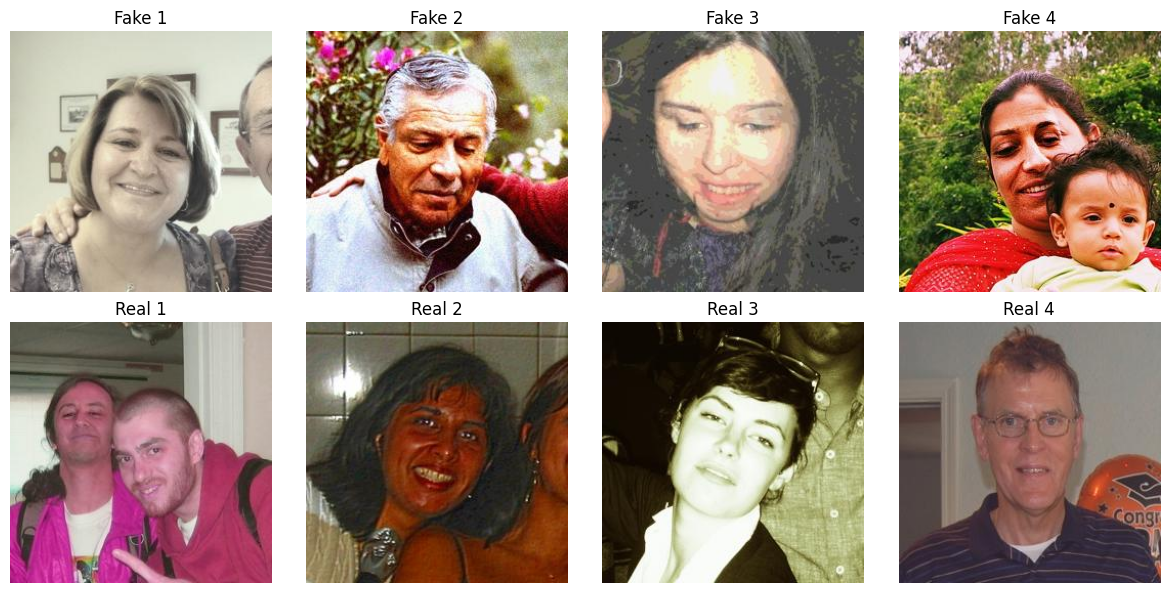

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the folder paths
fake_folder = "/content/Dataset/Dataset/Test/Fake"
real_folder = "/content/Dataset/Dataset/Test/Real"

# Get list of random image files from fake and real folders
fake_images = random.sample(os.listdir(fake_folder), 4)
real_images = random.sample(os.listdir(real_folder), 4)

# Create a 4x4 grid for displaying images
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# Display fake images
for i, img_name in enumerate(fake_images):
    img_path = os.path.join(fake_folder, img_name)
    img = mpimg.imread(img_path)
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Fake {i+1}")
    axs[0, i].axis('off')

# Display real images
for i, img_name in enumerate(real_images):
    img_path = os.path.join(real_folder, img_name)
    img = mpimg.imread(img_path)
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"Real {i+1}")
    axs[1, i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()




# Imports and Dataset Prepration

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.metrics import roc_curve, roc_auc_score
import cv2
import matplotlib.pyplot as plt
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow import keras
import tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,BatchNormalization,GlobalAveragePooling2D,Dropout,MaxPooling2D,Attention,Conv2D,concatenate
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications import Xception,VGG16,VGG19,MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Layer, MultiHeadAttention
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, LeakyReLU
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [ ]:
train_path="/content/Dataset/Dataset/Train"
test_path="/content/Dataset/Dataset/Test"
val_path="/content/Dataset/Dataset/Validation"

In [ ]:
train_datagen = ImageDataGenerator(
                                   rescale=1./255,
                                   #rotation_range=20,
                                   #width_shift_range=0.2,
                                   #height_shift_range=0.2,
                                   #shear_range=0.2,
                                   #zoom_range=0.2,
                                   #horizontal_flip=True,
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(  rescale=1./255.0)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (256,256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (256,256),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle=False)
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (256,256),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 140002 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.


# Train Network 1 - XceptionNet


In [ ]:
# Define your data input shape
input_shape = (224, 224, 3)  # Adjust according to your dataset

# Load the Xception model without the top layer (fully connected layer)
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False
#for layer in base_model.layers[-20:]:
    #layer.trainable = True
# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
combined_model = Model(inputs=base_model.input, outputs=predictions)

83683744/83683744 [==============================] - 5s 0us/step


In [ ]:
learning_rate = 0.00001  # You can set your desired learning rate value

# Create an Adam optimizer instance with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

In [ ]:
combined_model.compile(optimizer=optimizer, loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = combined_model.fit(
    training_set,
    epochs=30,
    validation_data=val_set,
    #callbacks=[callbacks]
)

Epoch 1/3
4376/4376 [==============================] - 898s 203ms/step - loss: 0.5921 - accuracy: 0.6906 - val_loss: 0.5211 - val_accuracy: 0.7445
Epoch 2/3
4376/4376 [==============================] - 899s 205ms/step - loss: 0.5141 - accuracy: 0.7480 - val_loss: 0.4952 - val_accuracy: 0.7579
Epoch 3/3
4376/4376 [==============================] - 877s 200ms/step - loss: 0.4927 - accuracy: 0.7598 - val_loss: 0.4832 - val_accuracy: 0.7655


In [ ]:
# Save the model
combined_model.save("xception_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the model in the native Keras format
combined_model.save("xception_model.keras")

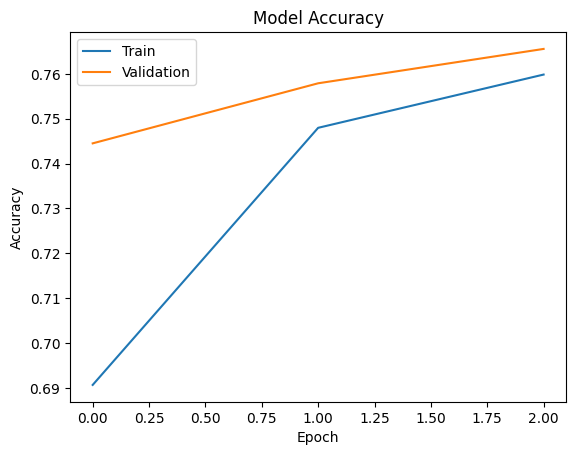

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

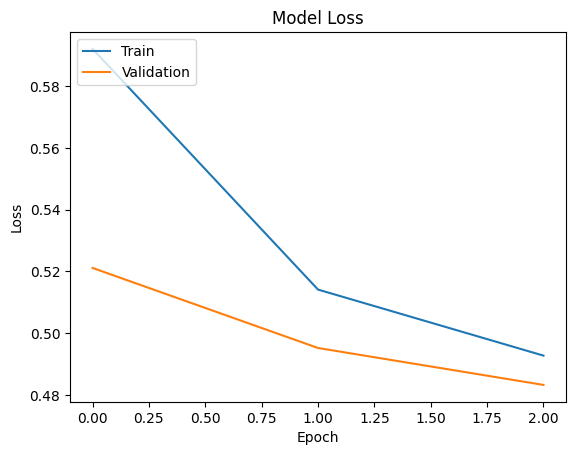

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [1]:
# Predict the classes using the test set
test_pred = combined_model.predict(test_set)
test_pred_classes = np.round(test_pred)

# Get the true classes of the test set
test_true_classes = test_set.classes

NameError: name 'combined_model' is not defined

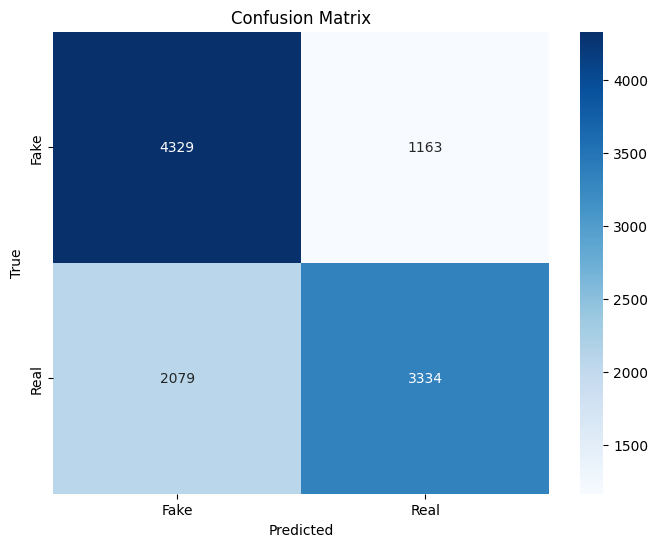

In [ ]:
# Plot confusion matrix as a heatmap
# Generate confusion matrix
cm = confusion_matrix(test_true_classes, test_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_set.class_indices.keys(),
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
evaluation = combined_model.evaluate(test_set)

341/341 [==============================] - 53s 156ms/step - loss: 0.5703 - accuracy: 0.7027


In [ ]:
print("Test Accuracy: {:.2f}%".format(evaluation[1] * 100))

Test Accuracy: 70.27%


In [ ]:
#Classification report
report = classification_report(test_true_classes, test_pred_classes, target_names=["Class 0", "Class 1"], labels=[0, 1], digits=4)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Class 0     0.6756    0.7882    0.7276      5492
     Class 1     0.7414    0.6159    0.6729      5413

    accuracy                         0.7027     10905
   macro avg     0.7085    0.7021    0.7002     10905
weighted avg     0.7082    0.7027    0.7004     10905



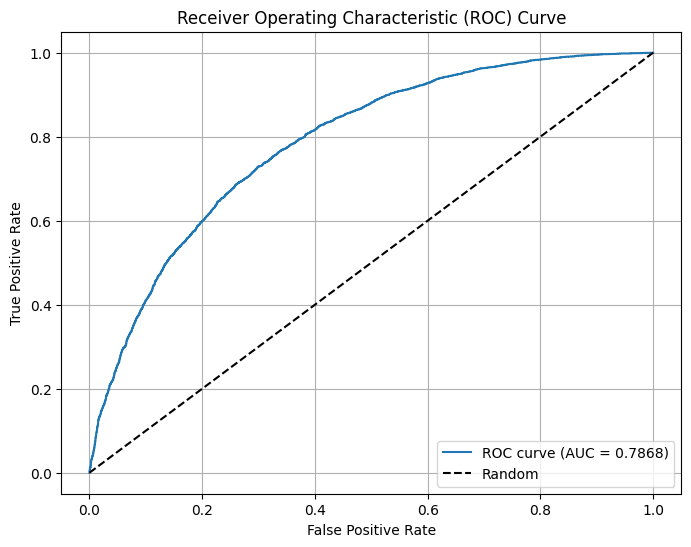

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_true_classes, test_pred)

# Calculate AUC
auc = roc_auc_score(test_true_classes, test_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.4f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

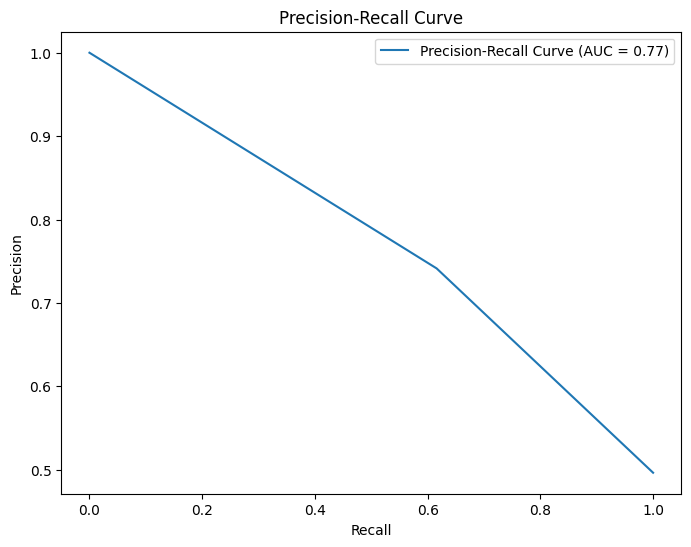

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(test_true_classes, test_pred_classes)

# Calculate the area under the precision-recall curve (AUC-PR)
auc_pr = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(test_true_classes, test_pred_classes).ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Sensitivity (True Positive Rate): {sensitivity:.4f}')
print(f'Specificity (True Negative Rate): {specificity:.4f}')

Sensitivity (True Positive Rate): 0.6159
Specificity (True Negative Rate): 0.7882


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Assuming you have obtained test_pred_classes and test_true_classes as described earlier

# Calculate F1 score for the test classes
f1 = f1_score(test_true_classes, test_pred_classes)
# Calculate accuracy to get error rate
accuracy = accuracy_score(test_true_classes, test_pred_classes)
error_rate = 1 - accuracy
# Calculate G-mean
g_mean = (sensitivity * specificity) ** 0.5

# Calculate F-measure
f_measure = 2 * ((sensitivity * specificity) / (sensitivity + specificity))

print(f'F1 Score: {f1:.4f}')
print(f'Error Rate: {error_rate:.4f}')
print(f'G-mean: {g_mean:.4f}')
print(f'F-measure: {f_measure:.4f}')

F1 Score: 0.6729
Error Rate: 0.2973
G-mean: 0.6968
F-measure: 0.6915


# Train Network 2 - VGG19 (Low Accuracy)

In [ ]:
# Define your data input shape
input_shape = (224, 224, 3)  # Adjust according to your dataset

# Load the VGG19 model without the top layer (fully connected layer)
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the base model
for layer in base_model_vgg19.layers:
    layer.trainable = False

# Add custom layers for classification
x = base_model_vgg19.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
combined_model_vgg19 = Model(inputs=base_model_vgg19.input, outputs=predictions)

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
learning_rate = 0.00001  # You can set your desired learning rate value

# Create an Adam optimizer instance with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

In [ ]:
combined_model_vgg19.compile(optimizer=optimizer, loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_vgg19 = combined_model_vgg19.fit(
    training_set,
    epochs=30,
    validation_data=val_set,
    #callbacks=[callbacks]
)

Epoch 1/3
4376/4376 [==============================] - 1081s 245ms/step - loss: 0.6570 - accuracy: 0.6537 - val_loss: 0.6346 - val_accuracy: 0.6756
Epoch 2/3
4376/4376 [==============================] - 1033s 236ms/step - loss: 0.6027 - accuracy: 0.7076 - val_loss: 0.5939 - val_accuracy: 0.7021
Epoch 3/3
4376/4376 [==============================] - 1033s 236ms/step - loss: 0.5655 - accuracy: 0.7237 - val_loss: 0.5668 - val_accuracy: 0.7128


In [ ]:
# Save the model
combined_model_vgg19.save("vgg19_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
combined_model_vgg19.save("vgg19_model.keras")

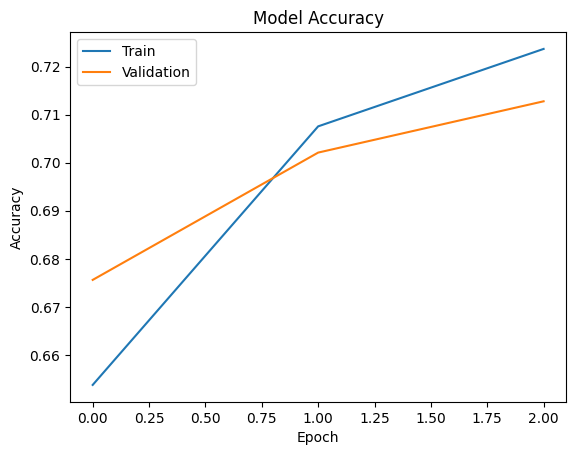

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_vgg19.history['accuracy'])
plt.plot(history_vgg19.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

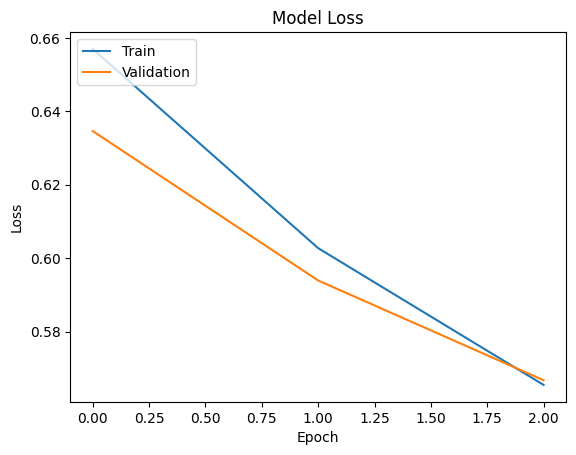

In [ ]:
# Plot training & validation loss values
plt.plot(history_vgg19.history['loss'])
plt.plot(history_vgg19.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Predict the classes using the test set
test_pred_vgg19 = combined_model_vgg19.predict(test_set)
test_pred_classes_vgg19 = np.round(test_pred_vgg19)

# Get the true classes of the test set
test_true_classes_vgg19 = test_set.classes

341/341 [==============================] - 68s 199ms/step


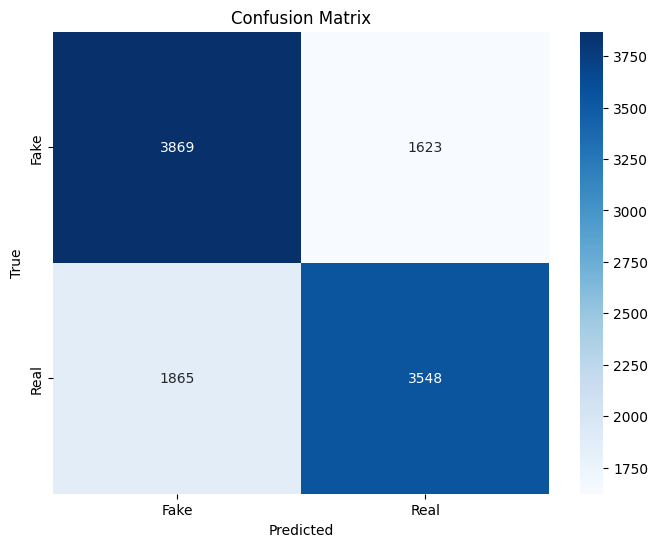

In [ ]:
# Plot confusion matrix as a heatmap
# Generate confusion matrix
cm_vgg19 = confusion_matrix(test_true_classes_vgg19, test_pred_classes_vgg19)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_vgg19, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_set.class_indices.keys(),
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
evaluation_vgg19 = combined_model_vgg19.evaluate(test_set)


341/341 [==============================] - 63s 183ms/step - loss: 0.5972 - accuracy: 0.6801


In [ ]:
print("Test Accuracy: {:.2f}%".format(evaluation_vgg19[1] * 100))


Test Accuracy: 68.01%


In [ ]:
#Classification report
report_vgg19 = classification_report(test_true_classes_vgg19, test_pred_classes_vgg19, target_names=["Class 0", "Class 1"], labels=[0, 1], digits=4)

print("Classification Report:\n", report_vgg19)

Classification Report:
               precision    recall  f1-score   support

     Class 0     0.6747    0.7045    0.6893      5492
     Class 1     0.6861    0.6555    0.6704      5413

    accuracy                         0.6801     10905
   macro avg     0.6804    0.6800    0.6799     10905
weighted avg     0.6804    0.6801    0.6799     10905



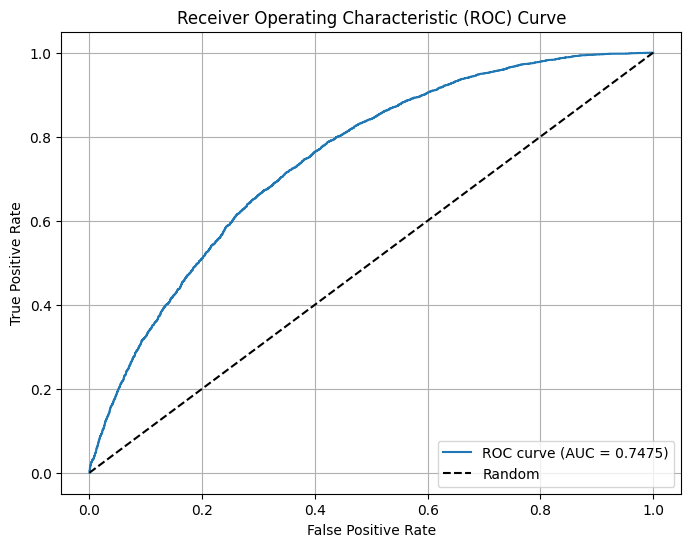

In [ ]:
# Calculate ROC curve
fpr_vgg19, tpr_vgg19, thresholds_vgg19 = roc_curve(test_true_classes_vgg19, test_pred_vgg19)

# Calculate AUC
auc_vgg19 = roc_auc_score(test_true_classes_vgg19, test_pred_vgg19)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_vgg19, tpr_vgg19, label='ROC curve (AUC = {:.4f})'.format(auc_vgg19))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

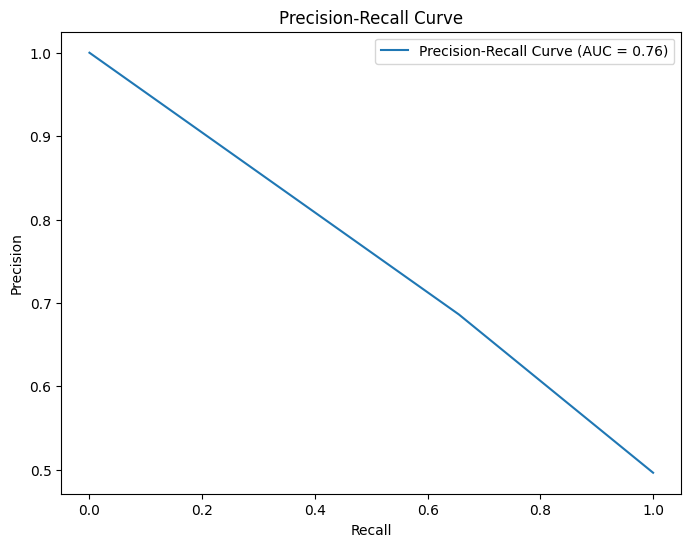

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
# Compute precision and recall
precision_vgg19, recall_vgg19, thresholds_vgg19 = precision_recall_curve(test_true_classes_vgg19, test_pred_classes_vgg19)

# Calculate the area under the precision-recall curve (AUC-PR)
auc_pr_vgg19 = auc(recall_vgg19, precision_vgg19)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_vgg19, precision_vgg19, label=f'Precision-Recall Curve (AUC = {auc_pr_vgg19:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
# Compute confusion matrix
tn_vgg19, fp_vgg19, fn_vgg19, tp_vgg19 = confusion_matrix(test_true_classes_vgg19, test_pred_classes_vgg19).ravel()

# Calculate sensitivity and specificity
sensitivity_vgg19 = tp_vgg19 / (tp_vgg19 + fn_vgg19)
specificity_vgg19 = tn_vgg19 / (tn_vgg19 + fp_vgg19)

print(f'Sensitivity (True Positive Rate): {sensitivity_vgg19:.4f}')
print(f'Specificity (True Negative Rate): {specificity_vgg19:.4f}')

Sensitivity (True Positive Rate): 0.6555
Specificity (True Negative Rate): 0.7045


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Assuming you have obtained test_pred_classes_vgg19 and test_true_classes_vgg19 as described earlier

# Calculate F1 score for the test classes
f1_vgg19 = f1_score(test_true_classes_vgg19, test_pred_classes_vgg19)
# Calculate accuracy to get error rate
accuracy_vgg19 = accuracy_score(test_true_classes_vgg19, test_pred_classes_vgg19)
error_rate_vgg19 = 1 - accuracy_vgg19
# Calculate G-mean
g_mean_vgg19 = (sensitivity_vgg19 * specificity_vgg19) ** 0.5

# Calculate F-measure
f_measure_vgg19 = 2 * ((sensitivity_vgg19 * specificity_vgg19) / (sensitivity_vgg19 + specificity_vgg19))

print(f'F1 Score: {f1_vgg19:.4f}')
print(f'Error Rate: {error_rate_vgg19:.4f}')
print(f'G-mean: {g_mean_vgg19:.4f}')
print(f'F-measure: {f_measure_vgg19:.4f}')

F1 Score: 0.6704
Error Rate: 0.3199
G-mean: 0.6795
F-measure: 0.6791


# Train Network 3 - Resnet (Low Accuracy)

In [ ]:
# Define your data input shape
input_shape = (224, 224, 3)  # Adjust according to your dataset

# Load the ResNet model without the top layer (fully connected layer)
base_model_resnet = tensorflow.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the base model
for layer in base_model_resnet.layers:
    layer.trainable = False

# Add custom layers for classification
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
combined_model_resnet = Model(inputs=base_model_resnet.input, outputs=predictions)


94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
learning_rate = 0.00001  # You can set your desired learning rate value

# Create an Adam optimizer instance with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

In [ ]:
combined_model_resnet.compile(optimizer=optimizer, loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_resnet = combined_model_resnet.fit(
    training_set,
    epochs=30,
    validation_data=val_set,
    #callbacks=[callbacks]
)


Epoch 1/3
4376/4376 [==============================] - 746s 169ms/step - loss: 0.6892 - accuracy: 0.5610 - val_loss: 0.6897 - val_accuracy: 0.5478
Epoch 2/3
4376/4376 [==============================] - 736s 168ms/step - loss: 0.6798 - accuracy: 0.5922 - val_loss: 0.6861 - val_accuracy: 0.5579
Epoch 3/3
4376/4376 [==============================] - 747s 171ms/step - loss: 0.6726 - accuracy: 0.6047 - val_loss: 0.6831 - val_accuracy: 0.5717


In [ ]:
# Save the model
combined_model_resnet.save("resnet_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
combined_model_resnet.save("resnet_model.keras")

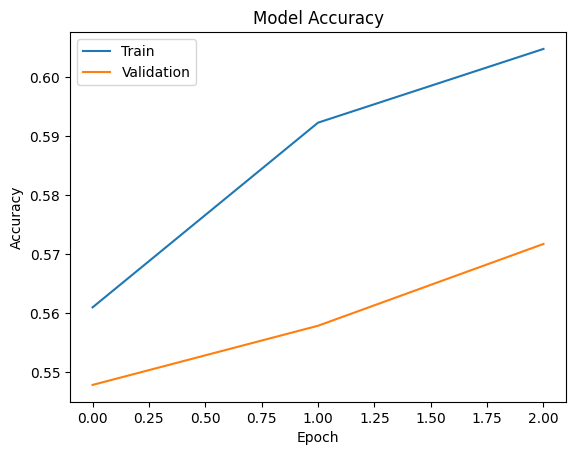

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


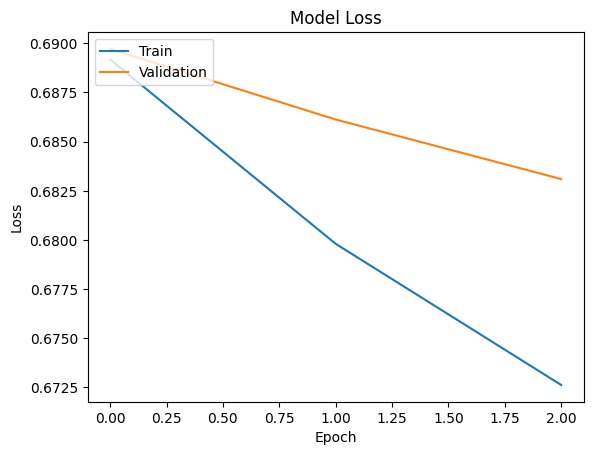

In [ ]:
# Plot training & validation loss values
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Predict the classes using the test set
test_pred_resnet = combined_model_resnet.predict(test_set)
test_pred_classes_resnet = np.round(test_pred_resnet)

# Get the true classes of the test set
test_true_classes_resnet = test_set.classes


341/341 [==============================] - 47s 134ms/step


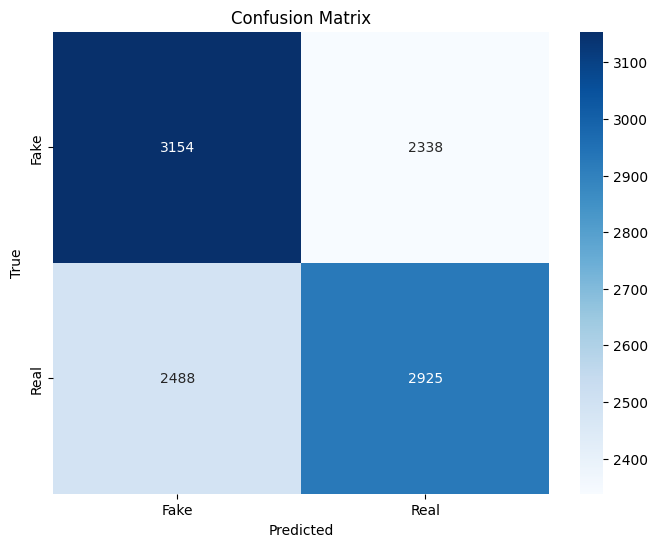

In [ ]:
# Plot confusion matrix as a heatmap
# Generate confusion matrix
cm_resnet = confusion_matrix(test_true_classes_resnet, test_pred_classes_resnet)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_set.class_indices.keys(),
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
evaluation_resnet = combined_model_resnet.evaluate(test_set)


178/341 [==============>...............] - ETA: 21s - loss: 0.7084 - accuracy: 0.5722

In [ ]:
print("Test Accuracy: {:.2f}%".format(evaluation_resnet[1] * 100))


In [ ]:
#Classification report
report_resnet = classification_report(test_true_classes_resnet, test_pred_classes_resnet, target_names=["Class 0", "Class 1"], labels=[0, 1], digits=4)

print("Classification Report:\n", report_resnet)

In [ ]:
# Calculate ROC curve
fpr_resnet, tpr_resnet, thresholds_resnet = roc_curve(test_true_classes_resnet, test_pred_resnet)

# Calculate AUC
auc_resnet = roc_auc_score(test_true_classes_resnet, test_pred_resnet)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_resnet, tpr_resnet, label='ROC curve (AUC = {:.4f})'.format(auc_resnet))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve, auc
# Compute precision and recall
precision_resnet, recall_resnet, thresholds_resnet = precision_recall_curve(test_true_classes_resnet, test_pred_classes_resnet)

# Calculate the area under the precision-recall curve (AUC-PR)
auc_pr_resnet = auc(recall_resnet, precision_resnet)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_resnet, precision_resnet, label=f'Precision-Recall Curve (AUC = {auc_pr_resnet:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
# Compute confusion matrix
tn_resnet, fp_resnet, fn_resnet, tp_resnet = confusion_matrix(test_true_classes_resnet, test_pred_classes_resnet).ravel()

# Calculate sensitivity and specificity
sensitivity_resnet = tp_resnet / (tp_resnet + fn_resnet)
specificity_resnet = tn_resnet / (tn_resnet + fp_resnet)

print(f'Sensitivity (True Positive Rate): {sensitivity_resnet:.4f}')
print(f'Specificity (True Negative Rate): {specificity_resnet:.4f}')


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Assuming you have obtained test_pred_classes_resnet and test_true_classes_resnet as described earlier

# Calculate F1 score for the test classes
f1_resnet = f1_score(test_true_classes_resnet, test_pred_classes_resnet)
# Calculate accuracy to get error rate
accuracy_resnet = accuracy_score(test_true_classes_resnet, test_pred_classes_resnet)
error_rate_resnet = 1 - accuracy_resnet
# Calculate G-mean
g_mean_resnet = (sensitivity_resnet * specificity_resnet) ** 0.5

# Calculate F-measure
f_measure_resnet = 2 * ((sensitivity_resnet * specificity_resnet) / (sensitivity_resnet + specificity_resnet))

print(f'F1 Score: {f1_resnet:.4f}')
print(f'Error Rate: {error_rate_resnet:.4f}')
print(f'G-mean: {g_mean_resnet:.4f}')
print(f'F-measure: {f_measure_resnet:.4f}')

# Train Network 4 - InceptionV3

In [ ]:
# Define your data input shape
input_shape = (299, 299, 3)  # Adjust according to your dataset

# Load the InceptionV3 model without the top layer (fully connected layer)
base_model_inception = tensorflow.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the base model
for layer in base_model_inception.layers:
    layer.trainable = False

# Add custom layers for classification
x = base_model_inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
combined_model_inception = Model(inputs=base_model_inception.input, outputs=predictions)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
learning_rate = 0.00001  # You can set your desired learning rate value

# Create an Adam optimizer instance with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)


In [ ]:
combined_model_inception.compile(optimizer=optimizer, loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_inception = combined_model_inception.fit(
    training_set,
    epochs=30,
    validation_data=val_set,
    #callbacks=[callbacks]
)

Epoch 1/3
1607/4376 [==========>...................] - ETA: 3:55:47 - loss: 0.6263 - accuracy: 0.6528

KeyboardInterrupt: 

In [ ]:
# Save the model
combined_model_inception.save("inception_model.h5")

In [ ]:
combined_model_inception.save("inception_model.keras")

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_inception.history['accuracy'])
plt.plot(history_inception.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Plot training & validation loss values
plt.plot(history_inception.history['loss'])
plt.plot(history_inception.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Predict the classes using the test set
test_pred_inception = combined_model_inception.predict(test_set)
test_pred_classes_inception = np.round(test_pred_inception)

# Get the true classes of the test set
test_true_classes_inception = test_set.classes

In [ ]:
# Plot confusion matrix as a heatmap
# Generate confusion matrix
cm_inception = confusion_matrix(test_true_classes_inception, test_pred_classes_inception)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_inception, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_set.class_indices.keys(),
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
evaluation_inception = combined_model_inception.evaluate(test_set)


In [ ]:
print("Test Accuracy: {:.2f}%".format(evaluation_inception[1] * 100))

In [ ]:
#Classification report
report_inception = classification_report(test_true_classes_inception, test_pred_classes_inception, target_names=["Class 0", "Class 1"], labels=[0, 1], digits=4)

print("Classification Report:\n", report_inception)

In [ ]:
# Calculate ROC curve
fpr_inception, tpr_inception, thresholds_inception = roc_curve(test_true_classes_inception, test_pred_inception)

# Calculate AUC
auc_inception = roc_auc_score(test_true_classes_inception, test_pred_inception)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_inception, tpr_inception, label='ROC curve (AUC = {:.4f})'.format(auc_inception))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve, auc
# Compute precision and recall
precision_inception, recall_inception, thresholds_inception = precision_recall_curve(test_true_classes_inception, test_pred_classes_inception)

# Calculate the area under the precision-recall curve (AUC-PR)
auc_pr_inception = auc(recall_inception, precision_inception)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_inception, precision_inception, label=f'Precision-Recall Curve (AUC = {auc_pr_inception:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
# Compute confusion matrix
tn_inception, fp_inception, fn_inception, tp_inception = confusion_matrix(test_true_classes_inception, test_pred_classes_inception).ravel()

# Calculate sensitivity and specificity
sensitivity_inception = tp_inception / (tp_inception + fn_inception)
specificity_inception = tn_inception / (tn_inception + fp_inception)

print(f'Sensitivity (True Positive Rate): {sensitivity_inception:.4f}')
print(f'Specificity (True Negative Rate): {specificity_inception:.4f}')

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Assuming you have obtained test_pred_classes_inception and test_true_classes_inception as described earlier

# Calculate F1 score for the test classes
f1_inception = f1_score(test_true_classes_inception, test_pred_classes_inception)
# Calculate accuracy to get error rate
accuracy_inception = accuracy_score(test_true_classes_inception, test_pred_classes_inception)
error_rate_inception = 1 - accuracy_inception
# Calculate G-mean
g_mean_inception = (sensitivity_inception * specificity_inception) ** 0.5

# Calculate F-measure
f_measure_inception = 2 * ((sensitivity_inception * specificity_inception) / (sensitivity_inception + specificity_inception))

print(f'F1 Score: {f1_inception:.4f}')
print(f'Error Rate: {error_rate_inception:.4f}')
print(f'G-mean: {g_mean_inception:.4f}')
print(f'F-measure: {f_measure_inception:.4f}')

# Train Network 5 - MobileNetV2

In [ ]:
# Define your data input shape
input_shape = (224, 224, 3)  # Adjust according to your dataset

# Load the MobileNetV2 model without the top layer (fully connected layer)
base_model_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the base model
for layer in base_model_mobilenet.layers:
    layer.trainable = False

# Add custom layers for classification
x = base_model_mobilenet.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
combined_model_mobilenet = Model(inputs=base_model_mobilenet.input, outputs=predictions)

In [ ]:
learning_rate = 0.00001  # You can set your desired learning rate value

# Create an Adam optimizer instance with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

In [ ]:
combined_model_mobilenet.compile(optimizer=optimizer, loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_mobilenet = combined_model_mobilenet.fit(
    training_set,
    epochs=3,
    validation_data=val_set,
    #callbacks=[callbacks]
)

In [ ]:
# Save the model
combined_model_mobilenet.save("mobilenet_model.h5")

In [ ]:
combined_model_mobilenet.save("mobilenet_model.keras")

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_mobilenet.history['accuracy'])
plt.plot(history_mobilenet.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Plot training & validation loss values
plt.plot(history_mobilenet.history['loss'])
plt.plot(history_mobilenet.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Predict the classes using the test set
test_pred_mobilenet = combined_model_mobilenet.predict(test_set)
test_pred_classes_mobilenet = np.round(test_pred_mobilenet)

# Get the true classes of the test set
test_true_classes_mobilenet = test_set.classes

In [ ]:
# Plot confusion matrix as a heatmap
# Generate confusion matrix
cm_mobilenet = confusion_matrix(test_true_classes_mobilenet, test_pred_classes_mobilenet)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mobilenet, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_set.class_indices.keys(),
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
evaluation_mobilenet = combined_model_mobilenet.evaluate(test_set)

In [ ]:
print("Test Accuracy: {:.2f}%".format(evaluation_mobilenet[1] * 100))

In [ ]:
#Classification report
report_mobilenet = classification_report(test_true_classes_mobilenet, test_pred_classes_mobilenet, target_names=["Class 0", "Class 1"], labels=[0, 1], digits=4)

print("Classification Report:\n", report_mobilenet)

In [ ]:
# Calculate ROC curve
fpr_mobilenet, tpr_mobilenet, thresholds_mobilenet = roc_curve(test_true_classes_mobilenet, test_pred_mobilenet)

# Calculate AUC
auc_mobilenet = roc_auc_score(test_true_classes_mobilenet, test_pred_mobilenet)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_mobilenet, tpr_mobilenet, label='ROC curve (AUC = {:.4f})'.format(auc_mobilenet))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
# Compute precision and recall
precision_mobilenet, recall_mobilenet, thresholds_mobilenet = precision_recall_curve(test_true_classes_mobilenet, test_pred_classes_mobilenet)

# Calculate the area under the precision-recall curve (AUC-PR)
auc_pr_mobilenet = auc(recall_mobilenet, precision_mobilenet)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_mobilenet, precision_mobilenet, label=f'Precision-Recall Curve (AUC = {auc_pr_mobilenet:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
# Compute confusion matrix
tn_mobilenet, fp_mobilenet, fn_mobilenet, tp_mobilenet = confusion_matrix(test_true_classes_mobilenet, test_pred_classes_mobilenet).ravel()

# Calculate sensitivity and specificity
sensitivity_mobilenet = tp_mobilenet / (tp_mobilenet + fn_mobilenet)
specificity_mobilenet = tn_mobilenet / (tn_mobilenet + fp_mobilenet)

print(f'Sensitivity (True Positive Rate): {sensitivity_mobilenet:.4f}')
print(f'Specificity (True Negative Rate): {specificity_mobilenet:.4f}')


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Assuming you have obtained test_pred_classes_mobilenet and test_true_classes_mobilenet as described earlier

# Calculate F1 score for the test classes
f1_mobilenet = f1_score(test_true_classes_mobilenet, test_pred_classes_mobilenet)
# Calculate accuracy to get error rate
accuracy_mobilenet = accuracy_score(test_true_classes_mobilenet, test_pred_classes_mobilenet)
error_rate_mobilenet = 1 - accuracy_mobilenet
# Calculate G-mean
g_mean_mobilenet = (sensitivity_mobilenet * specificity_mobilenet) ** 0.5

# Calculate F-measure
f_measure_mobilenet = 2 * ((sensitivity_mobilenet * specificity_mobilenet) / (sensitivity_mobilenet + specificity_mobilenet))

print(f'F1 Score: {f1_mobilenet:.4f}')
print(f'Error Rate: {error_rate_mobilenet:.4f}')
print(f'G-mean: {g_mean_mobilenet:.4f}')
print(f'F-measure: {f_measure_mobilenet:.4f}')


# Load Saved Models and Display Result Metrics

In [ ]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

zip_id = '1NkVeugtF4YIpG15UriqoUSacCgs7Q-dr'

download1 = drive.CreateFile({'id': zip_id})

# Download the file to a local disc
download1.GetContentFile('Results.zip')

In [ ]:
import zipfile
import os

# Path to your zip file
zip_file_path = "/content/Results.zip"

# Directory to extract the contents to
extracted_dir_path = "/content"

# Create a directory to extract the contents into
os.makedirs(extracted_dir_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

print("Extraction complete.")

Extraction complete.


XceptionNet Results:


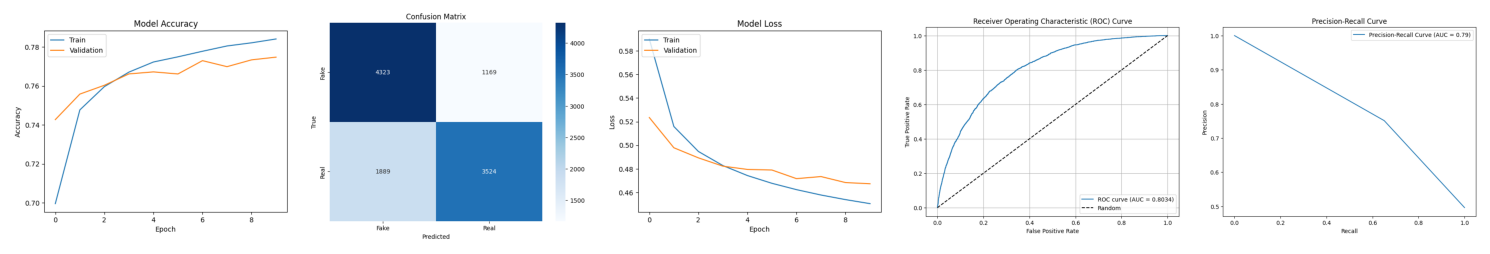

Inceptionv3 Results:


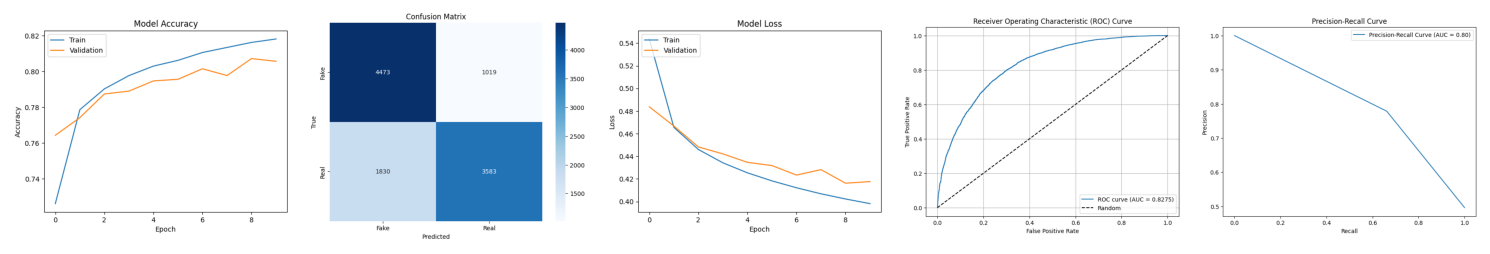

MobileNetV2 Results:


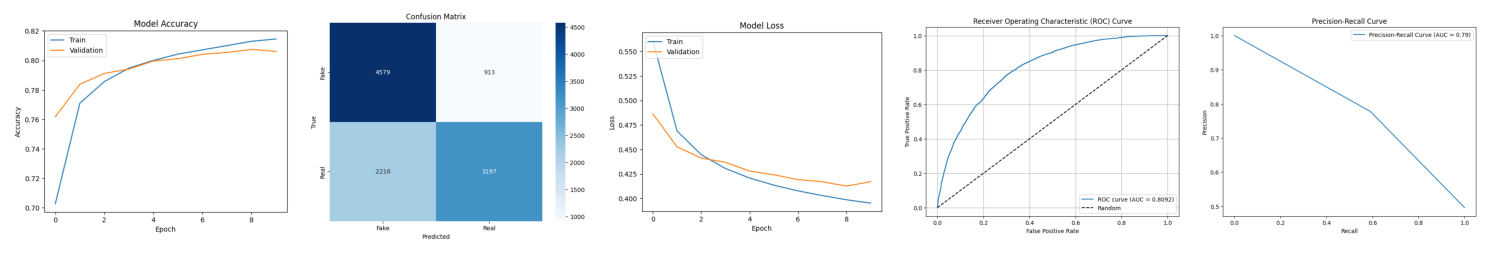

In [ ]:
import os
import matplotlib.pyplot as plt

# Function to display images from a folder in a single row
def display_images_from_folder(folder_path):
    # Get list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    num_images = len(image_files)

    # Create subplots
    fig, axs = plt.subplots(1, num_images, figsize=(15, 3))

    # Loop through images and display them in subplots
    for i, image_file in enumerate(image_files):
        # Read and display the image
        img_path = os.path.join(folder_path, image_file)
        img = plt.imread(img_path)
        axs[i].imshow(img)
        axs[i].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Folder paths for each model
xception_folder = "/content/Results/XceptionNet"
inception_folder = "/content/Results/InceptionV3"
mobilenet_folder = "/content/Results/MobileNetV2"

# Display images for each model
print("XceptionNet Results:")
display_images_from_folder(xception_folder)

print("Inceptionv3 Results:")
display_images_from_folder(inception_folder)

print("MobileNetV2 Results:")
display_images_from_folder(mobilenet_folder)


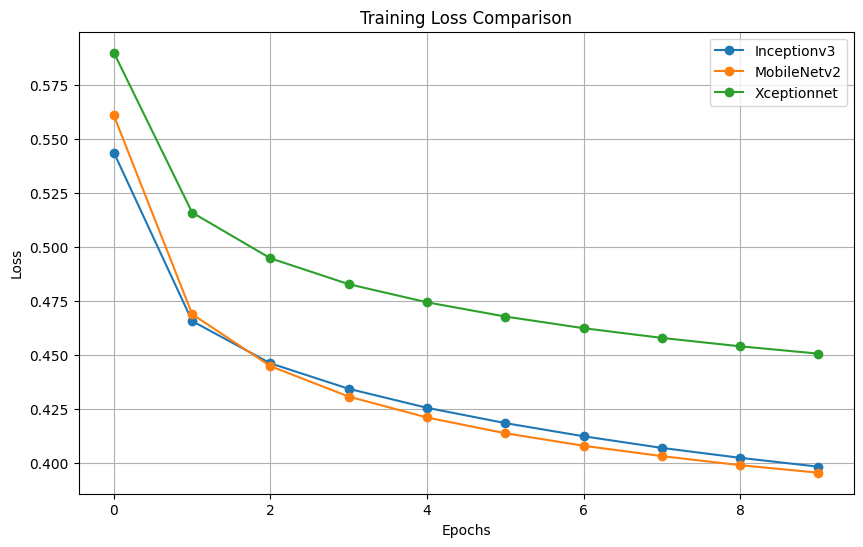

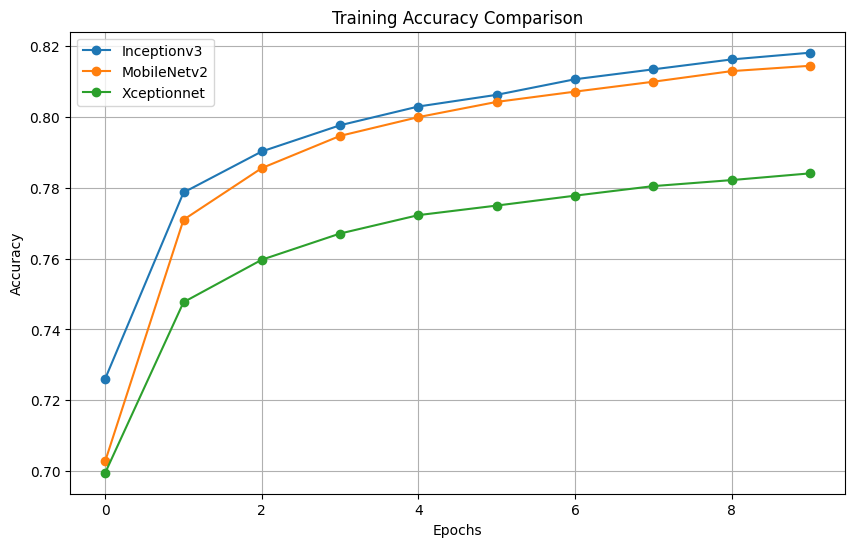

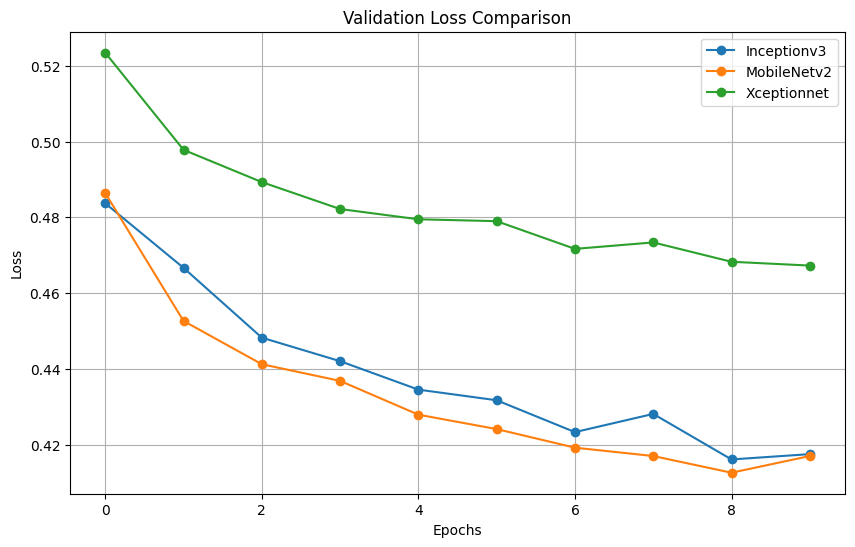

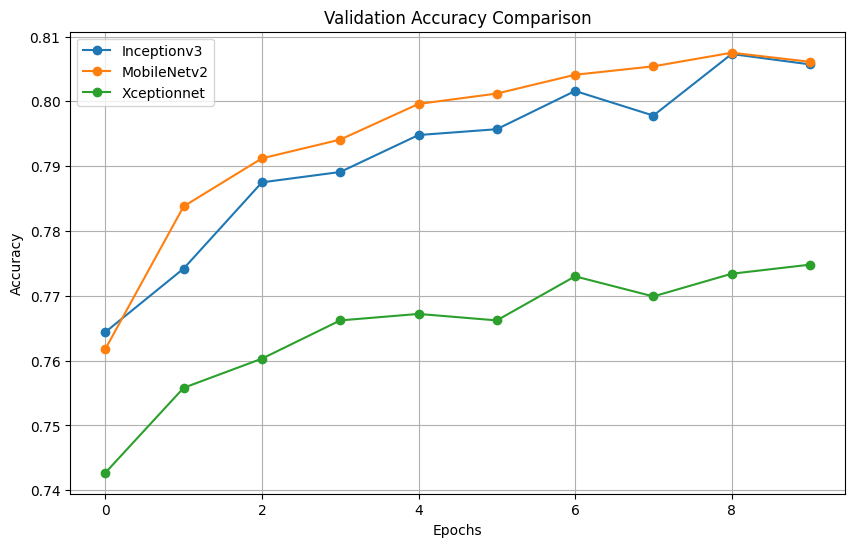

In [ ]:
import matplotlib.pyplot as plt

# Results for Inceptionv3
inception_loss = [0.5437, 0.4656, 0.4460, 0.4342, 0.4254, 0.4183, 0.4122, 0.4068, 0.4022, 0.3981]
inception_accuracy = [0.7261, 0.7787, 0.7903, 0.7977, 0.8030, 0.8063, 0.8107, 0.8135, 0.8163, 0.8182]
val_inception_loss = [0.4837, 0.4667, 0.4483, 0.4421, 0.4346, 0.4318, 0.4234, 0.4282, 0.4162, 0.4176]
val_inception_accuracy = [0.7644, 0.7742, 0.7875, 0.7891, 0.7948, 0.7957, 0.8016, 0.7978, 0.8073, 0.8057]

# Results for MobileNetv2
mobilenet_loss = [0.5609, 0.4688, 0.4447, 0.4306, 0.4209, 0.4136, 0.4078, 0.4030, 0.3988, 0.3953]
mobilenet_accuracy = [0.7028, 0.7710, 0.7856, 0.7947, 0.8000, 0.8043, 0.8072, 0.8100, 0.8130, 0.8145]
val_mobilenet_loss = [0.4864, 0.4527, 0.4413, 0.4369, 0.4280, 0.4242, 0.4193, 0.4171, 0.4127, 0.4171]
val_mobilenet_accuracy = [0.7618, 0.7838, 0.7912, 0.7941, 0.7996, 0.8012, 0.8041, 0.8054, 0.8075, 0.8061]

# Results for Xceptionnet
xception_loss = [0.5900, 0.5159, 0.4947, 0.4827, 0.4743, 0.4677, 0.4623, 0.4578, 0.4539, 0.4505]
xception_accuracy = [0.6995, 0.7477, 0.7597, 0.7671, 0.7723, 0.7750, 0.7778, 0.7805, 0.7822, 0.7841]
val_xception_loss = [0.5234, 0.4978, 0.4893, 0.4822, 0.4795, 0.4790, 0.4717, 0.4734, 0.4683, 0.4673]
val_xception_accuracy = [0.7427, 0.7558, 0.7603, 0.7662, 0.7672, 0.7662, 0.7730, 0.7699, 0.7734, 0.7748]

# Plotting loss
plt.figure(figsize=(10, 6))
plt.plot(inception_loss, label='Inceptionv3', marker='o')
plt.plot(mobilenet_loss, label='MobileNetv2', marker='o')
plt.plot(xception_loss, label='Xceptionnet', marker='o')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(inception_accuracy, label='Inceptionv3', marker='o')
plt.plot(mobilenet_accuracy, label='MobileNetv2', marker='o')
plt.plot(xception_accuracy, label='Xceptionnet', marker='o')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting validation loss
plt.figure(figsize=(10, 6))
plt.plot(val_inception_loss, label='Inceptionv3', marker='o')
plt.plot(val_mobilenet_loss, label='MobileNetv2', marker='o')
plt.plot(val_xception_loss, label='Xceptionnet', marker='o')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(val_inception_accuracy, label='Inceptionv3', marker='o')
plt.plot(val_mobilenet_accuracy, label='MobileNetv2', marker='o')
plt.plot(val_xception_accuracy, label='Xceptionnet', marker='o')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


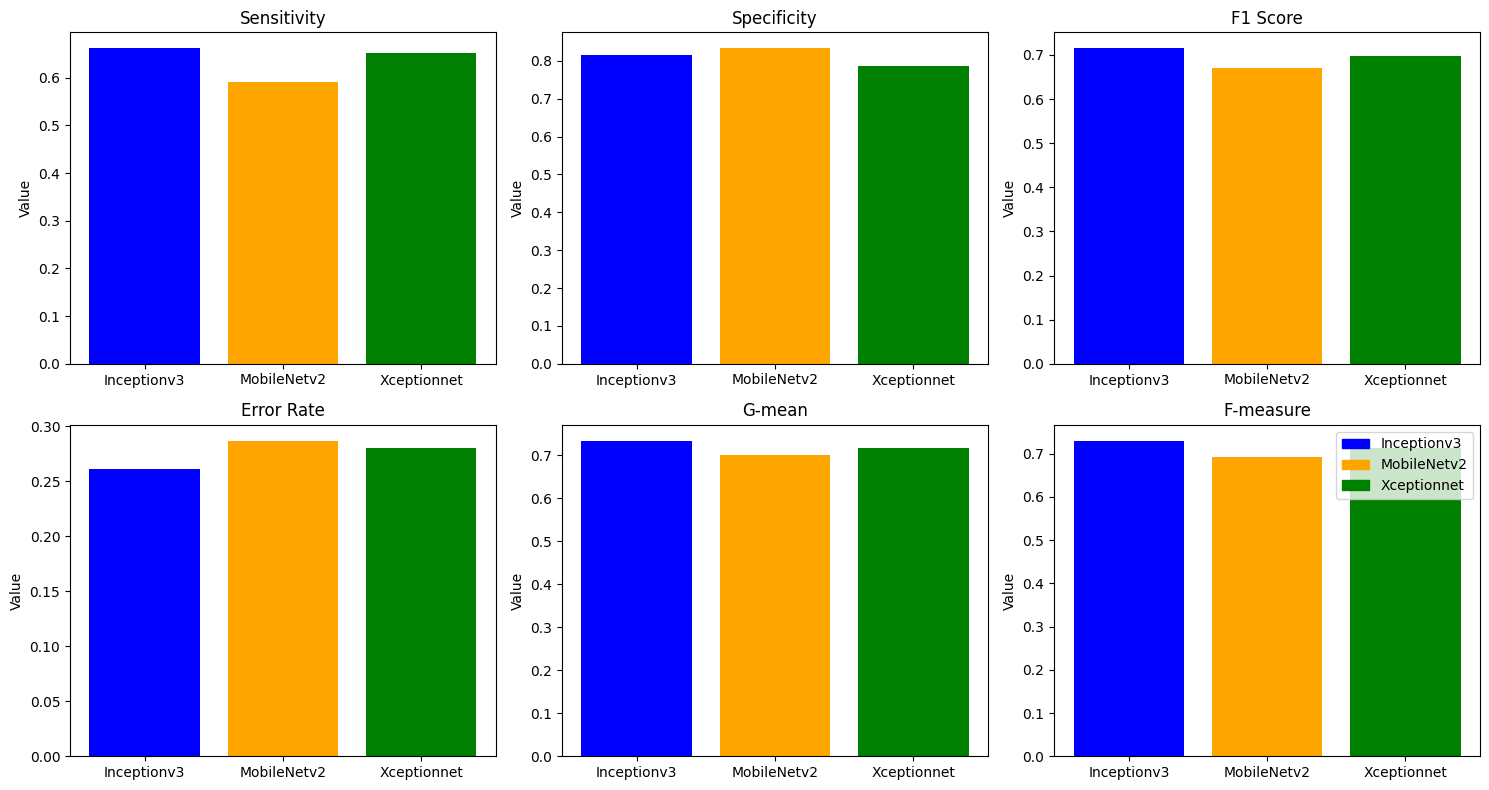

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for each model
inceptionv3 = {
    'Sensitivity': 0.6619,
    'Specificity': 0.8145,
    'F1 Score': 0.7155,
    'Error Rate': 0.2613,
    'G-mean': 0.7342,
    'F-measure': 0.7303
}

mobilenetv2 = {
    'Sensitivity': 0.5906,
    'Specificity': 0.8338,
    'F1 Score': 0.6714,
    'Error Rate': 0.2869,
    'G-mean': 0.7017,
    'F-measure': 0.6914
}

xceptionnet = {
    'Sensitivity': 0.6510,
    'Specificity': 0.7871,
    'F1 Score': 0.6974,
    'Error Rate': 0.2804,
    'G-mean': 0.7159,
    'F-measure': 0.7126
}

# Create a list of parameter names
parameters = list(inceptionv3.keys())

# Create a list of models and their corresponding parameter values
models = ['Inceptionv3', 'MobileNetv2', 'Xceptionnet']
values = [inceptionv3, mobilenetv2, xceptionnet]

# Set up the figure and axes
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Define colors for each model
colors = ['blue', 'orange', 'green']

# Plot each parameter
for i in range(len(parameters)):
    row = i // 3
    col = i % 3
    ax = axs[row, col]

    # Plot bars for each model
    for j, model in enumerate(models):
        ax.bar(model, values[j][parameters[i]], color=colors[j], label=model)

    ax.set_title(parameters[i])
    ax.set_ylabel('Value')

# Add legend
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(models))]
plt.legend(handles, models, loc='upper right')

plt.tight_layout()
plt.show()


# Image Inference

In [ ]:
from google.colab import files

# Upload a file from your local machine
uploaded = files.upload()

print("Upload Files for Inference...")
# Filter only JPG and PNG files
valid_extensions = ('.jpg', '.jpeg', '.png')
filtered_uploaded = {image_input_A: content for image_input_A, content in uploaded.items() if image_input_A.lower().endswith(valid_extensions)}

if not filtered_uploaded:
    print("No valid JPG or PNG files uploaded.")
else:
    # Print the uploaded file information
    for image_input_A, content in filtered_uploaded.items():
        print(f'Uploaded file: {image_input_A}, size: {len(content)} bytes')

Saving frame_6.jpg to frame_6.jpg
Upload Files for Inference...
Uploaded file: frame_6.jpg, size: 31484 bytes


1/1 [==============================] - 2s 2s/step
[[0.09457812]]


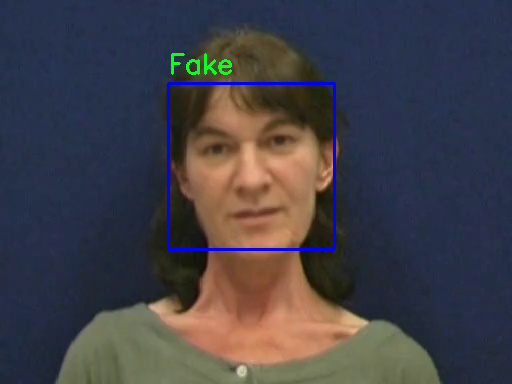

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import preprocess_input
from google.colab.patches import cv2_imshow

# Text input for selecting the model
model_selection = "Inceptionv3"  #@param ["Xception_Net", "Inceptionv3", "MobileNetV2"]

# Dictionary mapping model to threshold value
threshold_values = {
    'Xception_Net': 0.2,
    'Inceptionv3': 0.35,
    'MobileNetV2': 0.255
}

# Threshold value based on selected model
threshold = threshold_values[model_selection]

# Function to load the selected model
def load_selected_model(selected_model):
    if selected_model == 'Xception_Net':
        return load_model("/content/Results/XceptionNet/xception_model.h5")
    elif selected_model == 'Inceptionv3':
        return load_model("/content/Results/InceptionV3/inception_model.h5")
    elif selected_model == 'MobileNetV2':
        return load_model("/content/Results/MobileNetV2/mobilenet_model.h5")

# Load the selected model
model = load_selected_model(model_selection)

# Load the pre-trained face detection model (haarcascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to classify face using selected model
def classify_face(img):
    # Preprocess the image for selected model
    img = cv2.resize(img, (224, 224))  # Resize to match input shape of the model

    # Preprocess input based on the selected model
    if model_selection == 'Xception_Net':
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
    elif model_selection == 'Inceptionv3':
        img = cv2.resize(img, (299, 299))  # Resize to match input shape of Inceptionv3
        img = np.expand_dims(img, axis=0)
        img = img / 255.0  # Scale pixel values to [0, 1] as Inceptionv3 expects inputs in this range
    elif model_selection == 'MobileNetV2':
        img = cv2.resize(img, (224, 224))  # Resize to match input shape of MobileNetV2
        img = np.expand_dims(img, axis=0)
        img = img / 255.0  # Scale pixel values to [0, 1] as MobileNetV2 expects inputs in this range

    # Perform classification
    prediction = model.predict(img)

    print(prediction)

    # Use threshold value based on selected model
    if prediction[0][0] >= threshold:
        return "Real"
    else:
        return "Fake"

# Load an image
image_path = image_input_A
img = cv2.imread(image_path)

# Convert the image to grayscale for face detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# Crop faces and classify
for (x, y, w, h) in faces:
    # Crop face from the image
    face_img = img[y:y+h, x:x+w]

    # Classify the cropped face
    classification = classify_face(face_img)

    # Draw rectangle around the face
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Put classification label
    cv2.putText(img, classification, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

# Display the image with faces detected and classified
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Video Inference

In [ ]:
from google.colab import files

# Upload a file from your local machine
uploaded = files.upload()

print("Upload Files for Inference...")

# Filter only video files
valid_extensions = ('.mp4', '.avi', '.mov', '.mkv')  # Add more extensions if needed
filtered_uploaded = {video_input: content for video_input, content in uploaded.items() if video_input.lower().endswith(valid_extensions)}

if not filtered_uploaded:
    print("No valid video files uploaded.")
else:
    # Print the uploaded file information
    for video_input, content in filtered_uploaded.items():
        print(f'Uploaded file: {video_input}, size: {len(content)} bytes')



Saving fram1 original.mp4 to fram1 original.mp4
Upload Files for Inference...
Uploaded file: fram1 original.mp4, size: 151601 bytes


In [ ]:
# Frame wise prediction
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import preprocess_input

# Text input for selecting the model
model_selection = "Xception_Net"  #@param ["Xception_Net", "Inceptionv3", "MobileNetV2"]

# Dictionary mapping model to threshold value
threshold_values = {
    'Xception_Net': 0.2,
    'Inceptionv3': 0.35,
    'MobileNetV2': 0.255
}

# Threshold value based on selected model
threshold = threshold_values[model_selection]

# Function to load the selected model
def load_selected_model(selected_model):
    if selected_model == 'Xception_Net':
        return load_model("/content/Results/XceptionNet/xception_model.h5")
    elif selected_model == 'Inceptionv3':
        return load_model("/content/Results/InceptionV3/inception_model.h5")
    elif selected_model == 'MobileNetV2':
        return load_model("/content/Results/MobileNetV2/mobilenet_model.h5")

# Load the selected model
model = load_selected_model(model_selection)

# Load the pre-trained face detection model (haarcascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to classify face using selected model
def classify_face(img):
    # Preprocess the image for selected model
    img = cv2.resize(img, (224, 224))  # Resize to match input shape of the model

    # Preprocess input based on the selected model
    if model_selection == 'Xception_Net':
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
    elif model_selection == 'Inceptionv3':
        img = cv2.resize(img, (299, 299))  # Resize to match input shape of Inceptionv3
        img = np.expand_dims(img, axis=0)
        img = img / 255.0  # Scale pixel values to [0, 1] as Inceptionv3 expects inputs in this range
    elif model_selection == 'MobileNetV2':
        img = cv2.resize(img, (224, 224))  # Resize to match input shape of MobileNetV2
        img = np.expand_dims(img, axis=0)
        img = img / 255.0  # Scale pixel values to [0, 1] as MobileNetV2 expects inputs in this range

    # Perform classification
    prediction = model.predict(img,verbose=0)

    # Use threshold value based on selected model
    if prediction[0][0] >= threshold:
        return "Real"
    else:
        return "Fake"

# Open the input video file
video_path = video_input
cap = cv2.VideoCapture(video_path)

# Get the video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('/content/output_video_' + model_selection + '.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))
print("Processing Video...\nPlease Wait...")
# Process each frame in the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Crop faces and classify
    for (x, y, w, h) in faces:
        # Crop face from the frame
        face_img = frame[y:y+h, x:x+w]

        # Classify the cropped face
        classification = classify_face(face_img)

        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Put classification label
        cv2.putText(frame, classification, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Write the processed frame to the output video file
    out.write(frame)

# Release video capture and writer objects
cap.release()
out.release()

print("Video processing complete.")


Processing Video...
Please Wait...
Video processing complete.


In [ ]:
# Complete Video Classification
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import preprocess_input

# Text input for selecting the model
model_selection = "Xception_Net"  #@param ["Xception_Net", "Inceptionv3", "MobileNetV2"]

# Dictionary mapping model to threshold value
threshold_values = {
    'Xception_Net': 0.2,
    'Inceptionv3': 0.35,
    'MobileNetV2': 0.255
}

# Threshold value based on selected model
threshold = threshold_values[model_selection]

# Function to load the selected model
def load_selected_model(selected_model):
    if selected_model == 'Xception_Net':
        return load_model("/content/Results/XceptionNet/xception_model.h5")
    elif selected_model == 'Inceptionv3':
        return load_model("/content/Results/InceptionV3/inception_model.h5")
    elif selected_model == 'MobileNetV2':
        return load_model("/content/Results/MobileNetV2/mobilenet_model.h5")

# Load the selected model
model = load_selected_model(model_selection)

# Load the pre-trained face detection model (haarcascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Variables to count predictions
fake_count = 0
real_count = 0
print("Processing Video...\nPlease Wait...")
# Process each frame in the video to accumulate predictions
video_path = video_input
cap = cv2.VideoCapture(video_path)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Crop faces and classify
    for (x, y, w, h) in faces:
        # Crop face from the frame
        face_img = frame[y:y+h, x:x+w]

        # Preprocess the image for selected model
        img = cv2.resize(face_img, (224, 224))  # Resize to match input shape of the model
        if model_selection == 'Xception_Net':
            img = np.expand_dims(img, axis=0)
            img = preprocess_input(img)
        elif model_selection == 'Inceptionv3':
            img = cv2.resize(img, (299, 299))  # Resize to match input shape of Inceptionv3
            img = np.expand_dims(img, axis=0)
            img = img / 255.0  # Scale pixel values to [0, 1] as Inceptionv3 expects inputs in this range
        elif model_selection == 'MobileNetV2':
            img = cv2.resize(img, (224, 224))  # Resize to match input shape of MobileNetV2
            img = np.expand_dims(img, axis=0)
            img = img / 255.0  # Scale pixel values to [0, 1] as MobileNetV2 expects inputs in this range

        # Perform classification
        prediction = model.predict(img, verbose=0)

        # Use threshold value based on selected model
        if prediction[0][0] >= threshold:
            real_count += 1
        else:
            fake_count += 1

# Determine final prediction based on majority vote
if real_count > fake_count:
    final_prediction = "Real"
    confidence = real_count / (real_count + fake_count)
else:
    final_prediction = "Fake"
    confidence = fake_count / (real_count + fake_count)

# Release video capture object
cap.release()

# Process the video again to overlay the final prediction and confidence score on all frames
cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
out = cv2.VideoWriter('/content/output_video_' + model_selection + '_annotated.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))
font = cv2.FONT_HERSHEY_SIMPLEX
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Overlay the final prediction and confidence score on the frame
    text = f"Prediction: {final_prediction}, Confidence: {confidence:.2f}"
    cv2.putText(frame, text, (50, 50), font, 0.7, (255, 255, 255), 2, cv2.LINE_AA)

    # Write the frame to the output video file
    out.write(frame)

# Release video capture and writer objects
cap.release()
out.release()

print("Video processing complete.")


Processing Video...
Please Wait...
Video processing complete.
